## Prerequisites

Run this cell to prepare the environment. This step is obligatory.

In [ ]:
!pip install retentioneering

The full text of [Eventstream user guide](https://doc.retentioneering.com/release3/doc/user_guides/eventstream.html) is available on the retentioneering website.

## Eventstream creation

### Default field names

In [2]:
import pandas as pd

df1 = pd.DataFrame(
    [
        ['user_1', 'A', '2023-01-01 00:00:00'],
        ['user_1', 'B', '2023-01-01 00:00:01'],
        ['user_2', 'B', '2023-01-01 00:00:02'],
        ['user_2', 'A', '2023-01-01 00:00:03'],
        ['user_2', 'A', '2023-01-01 00:00:04'],
    ],
    columns=['user_id', 'event', 'timestamp']
)

In [3]:
from retentioneering.eventstream import Eventstream

stream1 = Eventstream(df1)

In [4]:
stream1.to_dataframe()

,event_id,event_type,event_index,event,timestamp,user_id
0,67ca4c62-f168-48b9-bca5-31004aca1ea4,raw,0,A,2023-01-01 00:00:00,user_1
1,e363da60-1e37-4b31-b942-f080a090afb5,raw,1,B,2023-01-01 00:00:01,user_1
2,f37511d4-882c-401b-8a20-b2d60497802e,raw,2,B,2023-01-01 00:00:02,user_2
3,26c62d80-ec33-4bb0-9cb0-4c1c26b8243a,raw,3,A,2023-01-01 00:00:03,user_2
4,85510a1b-10e4-4284-aa6c-ef8c8ade2890,raw,4,A,2023-01-01 00:00:04,user_2


### Custom field names

In [5]:
df2 = pd.DataFrame(
    [
        ['user_1', 'A', '2023-01-01 00:00:00'],
        ['user_1', 'B', '2023-01-01 00:00:01'],
        ['user_2', 'B', '2023-01-01 00:00:02'],
        ['user_2', 'A', '2023-01-01 00:00:03'],
        ['user_2', 'A', '2023-01-01 00:00:04']
    ],
     columns=['client_id', 'action', 'datetime']
)

raw_data_schema = {
    'user_id': 'client_id',
    'event_name': 'action',
    'event_timestamp': 'datetime'
}

stream2 = Eventstream(df2, raw_data_schema=raw_data_schema)
stream2.to_dataframe().head(3)

,event_id,event_type,event_index,event,timestamp,user_id
0,9c2e03b3-9e16-4c59-ab13-21fe310f3b0f,raw,0,A,2023-01-01 00:00:00,user_1
1,3fce68ce-3e54-411b-bc68-7ca05c172222,raw,1,B,2023-01-01 00:00:01,user_1
2,84871810-68fa-44d0-aa1b-9b4d7d399f83,raw,2,B,2023-01-01 00:00:02,user_2


In [6]:
df3 = pd.DataFrame(
    [
        ['user_1', 'A', '2023-01-01 00:00:00', 'session_1'],
        ['user_1', 'B', '2023-01-01 00:00:01', 'session_1'],
        ['user_2', 'B', '2023-01-01 00:00:02', 'session_2'],
        ['user_2', 'A', '2023-01-01 00:00:03', 'session_3'],
        ['user_2', 'A', '2023-01-01 00:00:04', 'session_3']
    ],
    columns=['client_id', 'action', 'datetime', 'session']
)

raw_data_schema = {
    'user_id': 'client_id',
    'event_name': 'action',
    'event_timestamp': 'datetime',
    'custom_cols': [
        {
            'raw_data_col': 'session',
            'custom_col': 'session_id'
        }
    ]
}

stream3 = Eventstream(df3, raw_data_schema=raw_data_schema)
stream3.to_dataframe().head(3)

,event_id,event_type,event_index,event,timestamp,user_id,session_id
0,97ff3f06-6593-4c7f-a5b6-040377d04ece,raw,0,A,2023-01-01 00:00:00,user_1,session_1
1,97852c27-4b28-4ea0-8aa9-42ab8faf47d0,raw,1,B,2023-01-01 00:00:01,user_1,session_1
2,c197d2ea-617f-4b13-b637-c1b9b70c6f57,raw,2,B,2023-01-01 00:00:02,user_2,session_2


### Eventstream field names

In [7]:
from retentioneering.eventstream import EventstreamSchema

new_eventstream_schema = EventstreamSchema(
    user_id='client_id',
    event_name='action',
    event_timestamp='datetime'
)

stream1_new_schema = Eventstream(df1, schema=new_eventstream_schema)
stream1_new_schema.to_dataframe().head(3)

,event_id,event_type,event_index,action,datetime,client_id
0,c9940979-b144-4642-9c2b-39876ecc2311,raw,0,A,2023-01-01 00:00:00,user_1
1,540daf68-b11c-4e2f-87e5-c2fefb880b23,raw,1,B,2023-01-01 00:00:01,user_1
2,9fad0b1a-be9a-4402-b582-a3339535a2c6,raw,2,B,2023-01-01 00:00:02,user_2


In [8]:
stream1_new_schema.schema

EventstreamSchema(event_id='event_id', event_type='event_type', event_index='event_index', event_name='action', event_timestamp='datetime', user_id='client_id', custom_cols=[])

### User sampling

In [9]:
from retentioneering import datasets

simple_shop_df = datasets.load_simple_shop(as_dataframe=True)
sampled_stream = Eventstream(
    simple_shop_df,
    user_sample_size=0.1,
    user_sample_seed=42
)

print('Original number of the events:', len(simple_shop_df))
print('Sampled number of the events:', len(sampled_stream.to_dataframe()))

unique_users_original = simple_shop_df['user_id'].nunique()
unique_users_sampled = sampled_stream.to_dataframe()['user_id'].nunique()

print('Original unique users number: ', unique_users_original)
print('Sampled unique users number: ', unique_users_sampled)

Original number of the events: 32283
Sampled number of the events: 3298
Original unique users number:  3751
Sampled unique users number:  375


<a name="displaying_eventstream"></a>
### Displaying eventstream

In [10]:
stream3.to_dataframe()

,event_id,event_type,event_index,event,timestamp,user_id,session_id
0,97ff3f06-6593-4c7f-a5b6-040377d04ece,raw,0,A,2023-01-01 00:00:00,user_1,session_1
1,97852c27-4b28-4ea0-8aa9-42ab8faf47d0,raw,1,B,2023-01-01 00:00:01,user_1,session_1
2,c197d2ea-617f-4b13-b637-c1b9b70c6f57,raw,2,B,2023-01-01 00:00:02,user_2,session_2
3,cbb49db3-b102-4e73-a974-11a142c72e98,raw,3,A,2023-01-01 00:00:03,user_2,session_3
4,31e35db3-fb38-4b9d-88d0-ece785e6dd31,raw,4,A,2023-01-01 00:00:04,user_2,session_3


## Eventstream index and reindex

In [11]:
df4 = pd.DataFrame(
    [
        ['user_1', 'A', '2023-01-01 00:00:00'],
        ['user_1', 'B', '2023-01-01 00:00:00'],
        ['user_2', 'B', '2023-01-01 00:00:03'],
        ['user_2', 'A', '2023-01-01 00:00:03'],
        ['user_2', 'A', '2023-01-01 00:00:04']
    ],
    columns=['user_id', 'event', 'timestamp']
)

stream4 = Eventstream(df4)
stream4.to_dataframe()

,event_id,event_type,event_index,event,timestamp,user_id
0,a1176281-859e-4a10-9cdb-2753093cd4b7,raw,0,A,2023-01-01 00:00:00,user_1
1,3249e407-9653-4381-b5d6-771df04f98c5,raw,1,B,2023-01-01 00:00:00,user_1
2,611fe1f0-906a-4165-ab38-d5f6189accfb,raw,2,B,2023-01-01 00:00:03,user_2
3,3c28b7c9-15c2-47b5-bc40-efcc0d802b1c,raw,3,A,2023-01-01 00:00:03,user_2
4,801f0ba6-a8ec-4963-a867-5c79440d2564,raw,4,A,2023-01-01 00:00:04,user_2


In [12]:
Eventstream(df4, events_order=["B", "A"]).to_dataframe()

,event_id,event_type,event_index,event,timestamp,user_id
0,c227811a-ad29-4fe9-adf2-2e1a97de1b22,raw,0,B,2023-01-01 00:00:00,user_1
1,898de74d-6c21-4d4c-a1db-10f8116283e8,raw,1,A,2023-01-01 00:00:00,user_1
2,ec2ea8bc-6420-4875-95ae-19c81eb384ba,raw,2,B,2023-01-01 00:00:03,user_2
3,99a4fab9-c2b0-4de5-b6d9-c0fa4981be18,raw,3,A,2023-01-01 00:00:03,user_2
4,398b378e-c9e5-4c5e-b18e-e51c05bfc5f3,raw,4,A,2023-01-01 00:00:04,user_2


In [13]:
IndexOrder = [
    "profile",
    "path_start",
    "new_user",
    "existing_user",
    "cropped_left",
    "session_start",
    "session_start_cropped",
    "group_alias",
    "raw",
    "raw_sleep",
    None,
    "synthetic",
    "synthetic_sleep",
    "positive_target",
    "negative_target",
    "session_end_cropped",
    "session_end",
    "session_sleep",
    "cropped_right",
    "absent_user",
    "lost_user",
    "path_end"
]

In [14]:
add_events_stream = stream4.add_positive_events(targets=['B'])
add_events_stream.to_dataframe()

,event_id,event_type,event_index,event,timestamp,user_id
0,a1176281-859e-4a10-9cdb-2753093cd4b7,raw,0,A,2023-01-01 00:00:00,user_1
1,3249e407-9653-4381-b5d6-771df04f98c5,raw,1,B,2023-01-01 00:00:00,user_1
2,d5e048b4-4f86-4739-86a4-18909aa55818,positive_target,1,positive_target_B,2023-01-01 00:00:00,user_1
3,611fe1f0-906a-4165-ab38-d5f6189accfb,raw,2,B,2023-01-01 00:00:03,user_2
4,27d9398b-439a-4483-98be-45f09f5f1eaf,positive_target,2,positive_target_B,2023-01-01 00:00:03,user_2
5,3c28b7c9-15c2-47b5-bc40-efcc0d802b1c,raw,3,A,2023-01-01 00:00:03,user_2
6,801f0ba6-a8ec-4963-a867-5c79440d2564,raw,4,A,2023-01-01 00:00:04,user_2


In [15]:
custom_sorting = [
    'profile',
    'path_start',
    'new_user',
    'existing_user',
    'cropped_left',
    'session_start',
    'session_start_cropped',
    'group_alias',
    'positive_target',
    'raw',
    'raw_sleep',
    None,
    'synthetic',
    'synthetic_sleep',
    'negative_target',
    'session_end_cropped',
    'session_end',
    'session_sleep',
    'cropped_right',
    'absent_user',
    'lost_user',
    'path_end'
]

add_events_stream.index_order = custom_sorting
add_events_stream.index_events()
add_events_stream.to_dataframe()

,event_id,event_type,event_index,event,timestamp,user_id
0,a1176281-859e-4a10-9cdb-2753093cd4b7,raw,0,A,2023-01-01 00:00:00,user_1
1,d5e048b4-4f86-4739-86a4-18909aa55818,positive_target,1,positive_target_B,2023-01-01 00:00:00,user_1
2,3249e407-9653-4381-b5d6-771df04f98c5,raw,1,B,2023-01-01 00:00:00,user_1
3,27d9398b-439a-4483-98be-45f09f5f1eaf,positive_target,2,positive_target_B,2023-01-01 00:00:03,user_2
4,611fe1f0-906a-4165-ab38-d5f6189accfb,raw,2,B,2023-01-01 00:00:03,user_2
5,3c28b7c9-15c2-47b5-bc40-efcc0d802b1c,raw,3,A,2023-01-01 00:00:03,user_2
6,801f0ba6-a8ec-4963-a867-5c79440d2564,raw,4,A,2023-01-01 00:00:04,user_2


## Descriptive methods

In [16]:
from retentioneering import datasets

stream_with_sessions = datasets\
    .load_simple_shop()\
    .split_sessions(timeout=(30, 'm'))

stream_with_sessions.to_dataframe().head()

,event_id,event_type,event_index,event,timestamp,user_id,session_id
0,5be7ea13-10cf-4425-8bd5-4946239c6875,session_start,0,session_start,2019-11-01 17:59:13.273932,219483890,219483890_1
1,44a8a07b-b045-49e1-bbc8-ffe02aea0ed8,raw,0,catalog,2019-11-01 17:59:13.273932,219483890,219483890_1
2,39f580c0-ac9f-4b18-9192-fc16ca5dc52c,raw,1,product1,2019-11-01 17:59:28.459271,219483890,219483890_1
3,06f1f986-f3ce-4972-b0fd-42962e4deaec,raw,2,cart,2019-11-01 17:59:29.502214,219483890,219483890_1
4,df7ed498-ff1d-4053-b989-fec179f3eeaf,raw,3,catalog,2019-11-01 17:59:32.557029,219483890,219483890_1


### General statistics

#### Describe

In [17]:
stream_with_sessions.describe()

value
category             metric                                 
overall              unique_users                       3751
                     unique_events                        14
                     unique_sessions                    6454
                     eventstream_start   2019-11-01 17:59:13
                     eventstream_end     2020-04-29 12:48:07
                     eventstream_length    179 days 18:48:53
path_length_time     mean                    9 days 11:15:18
                     std                    23 days 02:52:25
                     median                  0 days 00:01:21
                     min                     0 days 00:00:00
                     max                   149 days 04:51:05
path_length_steps    mean                              12.05
                     std                               11.43
                     median                              9.0
                     min                                   3
                     max                                 122
session_length_time  mean                    0 days 00:00:52
                     std                     0 days 00:01:08
                     median                  0 days 00:00:30
                     min                     0 days 00:00:00
                     max                     0 days 00:23:44
session_length_steps mean                                7.0
                     std                                4.18
                     median                              6.0
                     min                                   3
                     max                                  55

#### Describe events


In [18]:
stream = datasets.load_simple_shop()
stream.describe_events()

basic_statistics               \
                 number_of_occurrences unique_users   
event                                                 
cart                              2842         1924   
catalog                          14518         3611   
delivery_choice                   1686         1356   
delivery_courier                   834          748   
delivery_pickup                    506          469   
main                              5635         2385   
payment_card                       565          521   
payment_cash                       197          190   
payment_choice                    1107          958   
payment_done                       706          653   
product1                          1515         1122   
product2                          2172         1430   

                                                                   \
                 number_of_occurrences_shared unique_users_shared   
event                                                               
cart                                     0.09                0.51   
catalog                                  0.45                0.96   
delivery_choice                          0.05                0.36   
delivery_courier                         0.03                0.20   
delivery_pickup                          0.02                0.13   
main                                     0.17                0.64   
payment_card                             0.02                0.14   
payment_cash                             0.01                0.05   
payment_choice                           0.03                0.26   
payment_done                             0.02                0.17   
product1                                 0.05                0.30   
product2                                 0.07                0.38   

                 time_to_FO_user_wise                                   \
                                 mean              std          median   
event                                                                    
cart                  3 days 08:59:14 11 days 19:28:46 0 days 00:00:56   
catalog               0 days 05:44:21  3 days 03:22:32 0 days 00:00:00   
delivery_choice       5 days 09:18:08 15 days 03:19:15 0 days 00:01:12   
delivery_courier      6 days 18:14:55 16 days 17:51:39 0 days 00:01:28   
delivery_pickup       7 days 21:12:17 18 days 22:51:54 0 days 00:01:34   
main                  3 days 20:15:36  9 days 02:58:23 0 days 00:00:07   
payment_card          6 days 21:42:26 17 days 18:52:33 0 days 00:01:40   
payment_cash         13 days 23:17:25 24 days 00:00:02 0 days 00:02:18   
payment_choice        6 days 12:49:38 17 days 02:54:51 0 days 00:01:24   
payment_done          7 days 01:37:54 17 days 09:10:00 0 days 00:01:34   
product1              5 days 23:49:43 16 days 04:36:13 0 days 00:00:50   
product2              4 days 06:13:24 13 days 03:26:17 0 days 00:00:34   

                                                   steps_to_FO_user_wise  \
                             min               max                  mean   
event                                                                      
cart             0 days 00:00:01 118 days 16:11:36                  4.51   
catalog          0 days 00:00:00 100 days 08:19:51                  0.30   
delivery_choice  0 days 00:00:03 118 days 16:11:37                  6.78   
delivery_courier 0 days 00:00:06 118 days 16:11:38                  8.96   
delivery_pickup  0 days 00:00:06 114 days 01:24:06                  9.51   
main             0 days 00:00:00  97 days 21:24:23                  2.00   
payment_card     0 days 00:00:08 138 days 04:51:25                 11.14   
payment_cash     0 days 00:00:10 118 days 16:11:39                 14.15   
payment_choice   0 days 00:00:06 118 days 16:11:39                  9.42   
payment_done     0 days 00:00:08 115 days 09:18:59                 12.21   
product1         0 days 00:00:00 118 days 19:38:40           

In [19]:
stream.describe_events()
stream.describe_events(event_list=['payment_done', 'cart']).T

event                                                            cart  \
basic_statistics      number_of_occurrences                      2842   
                      unique_users                               1924   
                      number_of_occurrences_shared               0.09   
                      unique_users_shared                        0.51   
time_to_FO_user_wise  mean                            3 days 08:59:14   
                      std                            11 days 19:28:46   
                      median                          0 days 00:00:56   
                      min                             0 days 00:00:01   
                      max                           118 days 16:11:36   
steps_to_FO_user_wise mean                                       4.51   
                      std                                        4.09   
                      median                                      3.0   
                      min                                           1   
                      max                                          41   

event                                                    payment_done  
basic_statistics      number_of_occurrences                       706  
                      unique_users                                653  
                      number_of_occurrences_shared               0.02  
                      unique_users_shared                        0.17  
time_to_FO_user_wise  mean                            7 days 01:37:54  
                      std                            17 days 09:10:00  
                      median                          0 days 00:01:34  
                      min                             0 days 00:00:08  
                      max                           115 days 09:18:59  
steps_to_FO_user_wise mean                                      12.21  
                      std                                        8.29  
                      median                                     10.0  
                      min                                           5  
                      max                                          84

### Time-based histograms

#### User lifetime

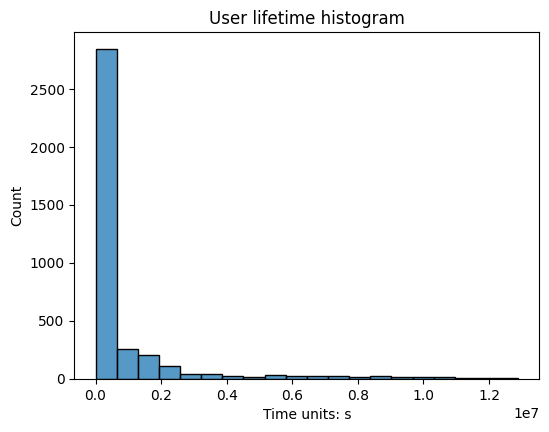

In [20]:
stream.user_lifetime_hist();

#### Timedelta between two events


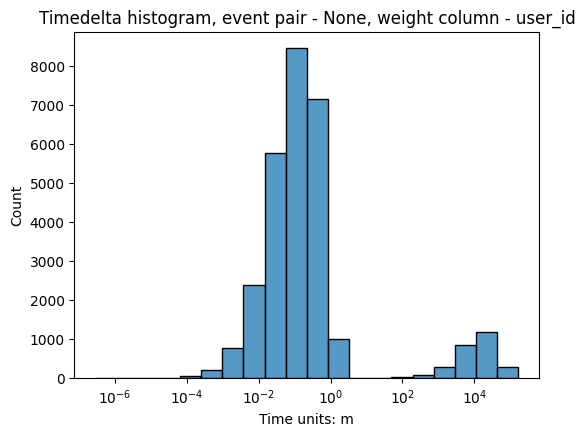

In [21]:
stream.timedelta_hist(log_scale=True, timedelta_unit='m');

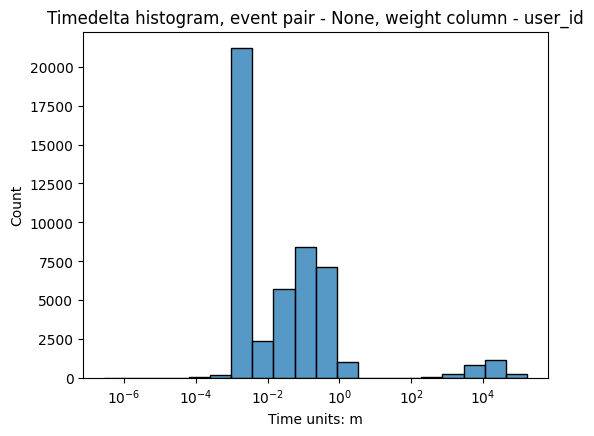

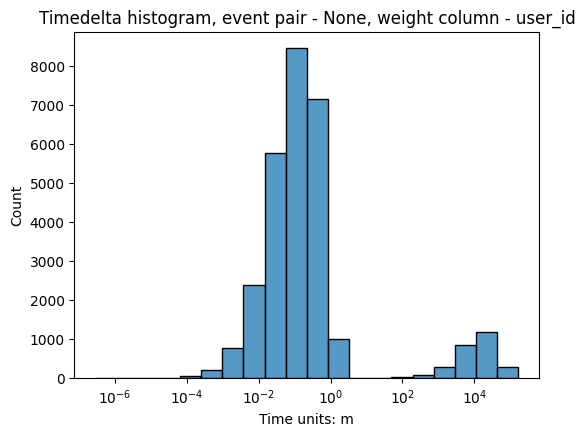

In [22]:
stream_with_synthetic = datasets\
    .load_simple_shop()\
    .add_start_end_events()\
    .split_sessions(timeout=(30, 'm'))

stream_with_synthetic.timedelta_hist(log_scale=True, timedelta_unit='m')
stream_with_synthetic.timedelta_hist(
    raw_events_only=True,
    log_scale=True,
    timedelta_unit='m'
);

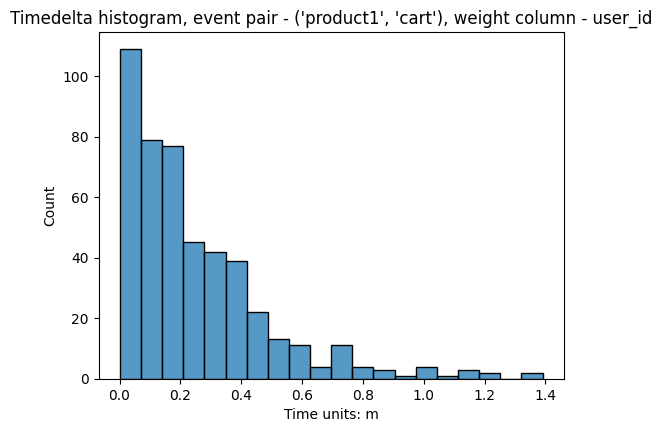

In [23]:
stream.timedelta_hist(event_pair=('product1', 'cart'), timedelta_unit='m');

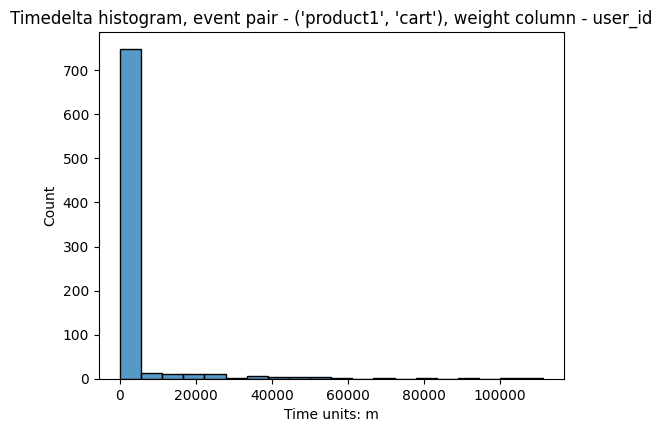

In [24]:
stream.timedelta_hist(
    event_pair=('product1', 'cart'),
    timedelta_unit='m',
    adjacent_events_only=False
);

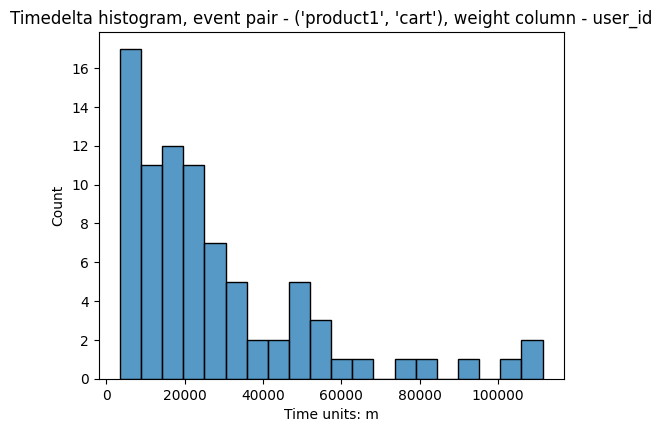

In [25]:
stream.timedelta_hist(
        event_pair=('product1', 'cart'),
        timedelta_unit='m',
        adjacent_events_only=False,
        lower_cutoff_quantile=0.9
    );

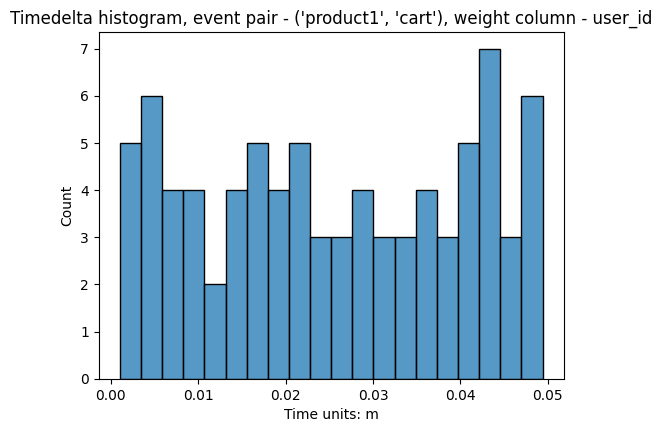

In [26]:
stream.timedelta_hist(
        event_pair=('product1', 'cart'),
        timedelta_unit='m',
        adjacent_events_only=False,
        upper_cutoff_quantile=0.1
    );

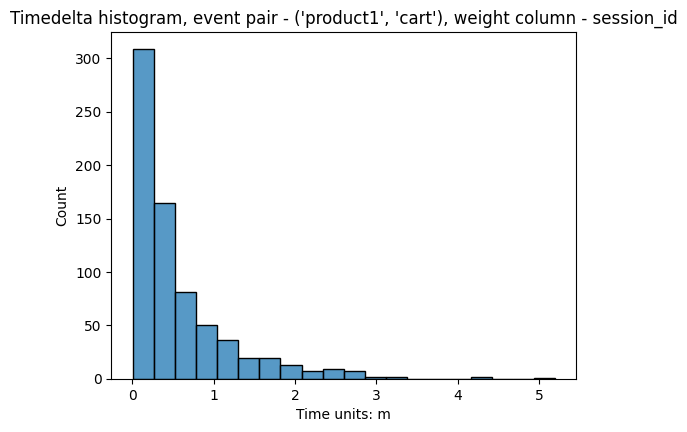

In [27]:
stream_with_synthetic\
    .timedelta_hist(
        event_pair=('product1', 'cart'),
        timedelta_unit='m',
        adjacent_events_only=False,
        weight_col='session_id'
    );

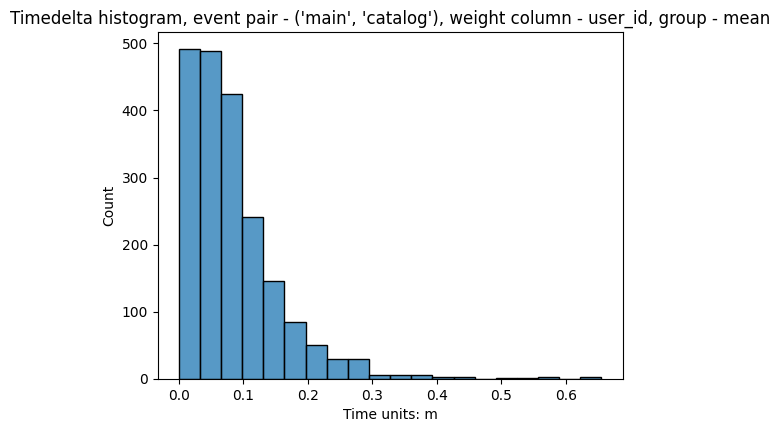

In [28]:
stream\
    .timedelta_hist(
        event_pair=('main', 'catalog'),
        timedelta_unit='m',
        adjacent_events_only=False,
        weight_col='user_id',
        time_agg='mean'
    );

#### Eventstream global events


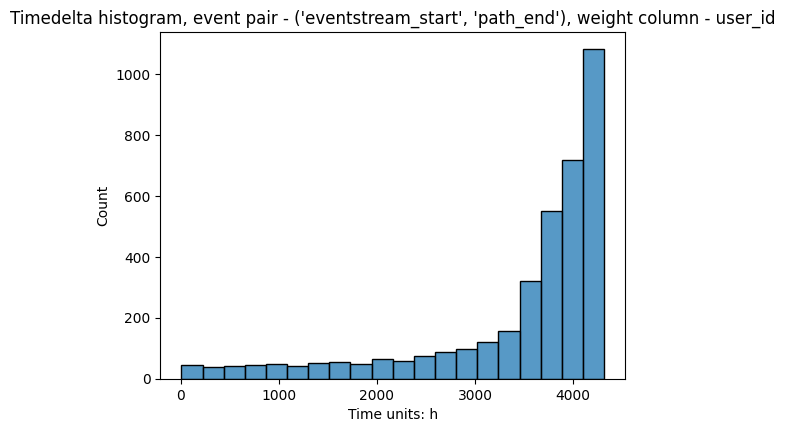

In [29]:
stream_with_synthetic\
    .timedelta_hist(
        event_pair=('eventstream_start', 'path_end'),
        timedelta_unit='h',
        adjacent_events_only=False
    );

### Events intensity

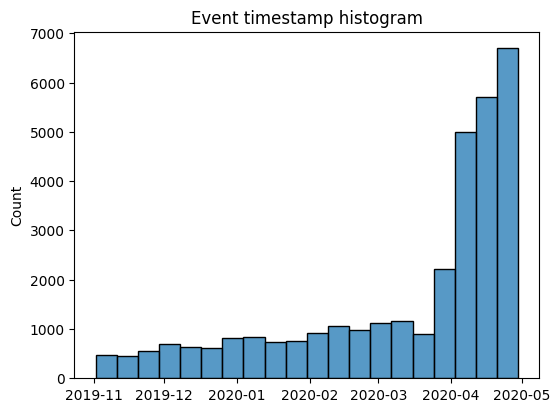

In [30]:
stream.event_timestamp_hist();

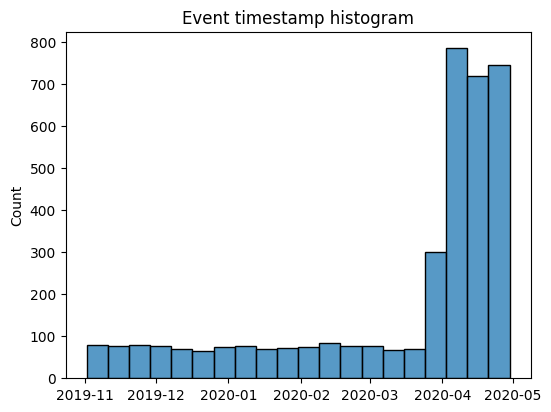

In [31]:
stream\
    .add_start_end_events()\
    .event_timestamp_hist(event_list=['path_start']);